In [110]:
import pandas as pd
import zipline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [111]:
start = pd.to_datetime('2016-01-01').tz_localize('US/Eastern')
end = pd.to_datetime('2018-01-01').tz_localize('US/Eastern')

In [112]:
from zipline.api import symbol, order_target, record, order

swindow = 50
lwindow = 100

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    context.i += 1
    if context.i < lwindow:
        return

    # Compute averages
    sma = data.history(context.asset, 'price', bar_count=swindow, frequency="1d").mean()
    lma = data.history(context.asset, 'price', bar_count=lwindow, frequency="1d").mean()

    current_price = data.current(context.asset, 'price')
    stop_price = (1 - 0.05)*current_price
    # Trading logic
    if sma > lma:
        order_target(context.asset, 300, stop_price=stop_price)
    elif sma < lma:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(
        AAPL=current_price,
        short_mavg=sma,
        long_mavg=lma
    )


In [113]:
summary = zipline.run_algorithm(
    start,
    end,
    initialize,
    100000.0,
    handle_data
)

C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [114]:
# summary[lwindow:][['AAPL', 'algo_volatility', 'algorithm_period_return', 'alpha',
#        'benchmark_period_return', 'benchmark_volatility', 'beta',
#        'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
#        'excess_return', 'gross_leverage', 'long_exposure', 'long_mavg',
#        'long_value', 'longs_count', 'max_drawdown', 'max_leverage',
#        'net_leverage', 'orders', 'period_close', 'period_label', 'period_open',
#        'pnl', 'portfolio_value', 'positions', 'returns', 'sharpe',
#        'short_exposure', 'short_mavg', 'short_value', 'shorts_count',
#        'sortino', 'starting_cash', 'starting_exposure', 'starting_value',
#        'trading_days', 'transactions']]

In [115]:
summary['portfolio_value'][-1]/summary['portfolio_value'][0]

1.173111295

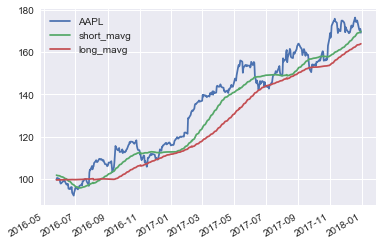

In [116]:
summary[['AAPL', 'short_mavg', 'long_mavg']].plot()

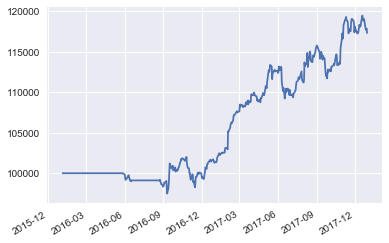

In [117]:
summary['portfolio_value'].plot()